# <center> Uczenie maszynowe </center>

Podstawową biblioteką jest `scikit-learn` dostępna pod skrótem `sklearn`.

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Regresja liniowa

Generujemy dane za pomocą podmodułu ```datasets```. Tworzymy 50 próbek z 50 cechami (```X_all```), z których tylko 10 jest istotnych dla przewidywania wyników z ```y_all```.

In [3]:
#to tylko sztuczne generowanie danych do nauki, a nie uczenie maszynowe
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10, random_state=10)

In [4]:
print(X_all.shape)
print(y_all.shape)

(50, 50)
(50,)


Dzielimy zbiór danych na zbiór uczący i zbiór na którym przetestujemy model. W tym celu korzystamy z ```model_selection.train_test_split```.

W celu przeprowadzenia regresji tworzymy najpierw model będący *obiektem* klasy ```linear_model.LinearRegression```. Najważniejsze metody i atrybuty:

* ```fit()``` - dopasowuje model do danych (uczących)
* ```predict()``` - przewiduje wynik dla nowych danych
* ```coef_``` - pokazuje dopasowane parametry modelu


Nauczony model jest w stanie przewidywać wyniki `y` za pomocą danych wejściowych `X`.

Obliczmy średnią kwadratową błędów (odchylenie standardowe) modelu od danych  na których się uczył

In [9]:
def sse(dane1,dane2):
    return np.sqrt(np.sum((dane1-dane2)**2)/dane1.size)
sse(y_train,y_train_pred)
# to samo co np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

1.6841399278613407e-13

Błąd jest bardzo mały, ponieważ model jest nadmiernie dopasowany (25 próbek z 50 cechami - tj. 50 niewiadomych i 25 równań - zawsze znajdzie się rozwiązanie). Z tego względu nie nadaje się on do przewidywania danych spoza tego zbioru. Sprawdźmy błąd na zbiorze testowym.

In [25]:
sse(y_test,model.predict(X_test))

326316.2661886166

**Uwaga:** inną miarą dopasowania, wbudowaną w sklearn, jest obliczanie współczynika $R^2$ metodą ```LinearRegression.score()``` naszego modelującego obiektu. Im $R^2$ jest bliższe 1 tym lepiej.

In [11]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.034382604368468295


Zobaczmy skąd pojawia bierze się tak duża wartość funkcji `sse`

In [13]:
def rysuj_roznice_i_współczynniki(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("Numer próbki")
    axes[0].set_ylabel("Różnica")
    axes[0].set_title("Zbiór uczący")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("Numer próbki")
    axes[1].set_ylabel("Różnica")
    axes[1].set_title("Zbiór testowy")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("Numer współczynnika")
    axes[2].set_ylabel("Wartość współczynnika")
    fig.tight_layout()
    return fig, axes

(<Figure size 1200x300 with 3 Axes>,
 array([<Axes: title={'center': 'Zbiór uczący'}, xlabel='Numer próbki', ylabel='Różnica'>,
        <Axes: title={'center': 'Zbiór testowy'}, xlabel='Numer próbki', ylabel='Różnica'>,
        <Axes: xlabel='Numer współczynnika', ylabel='Wartość współczynnika'>],
       dtype=object))

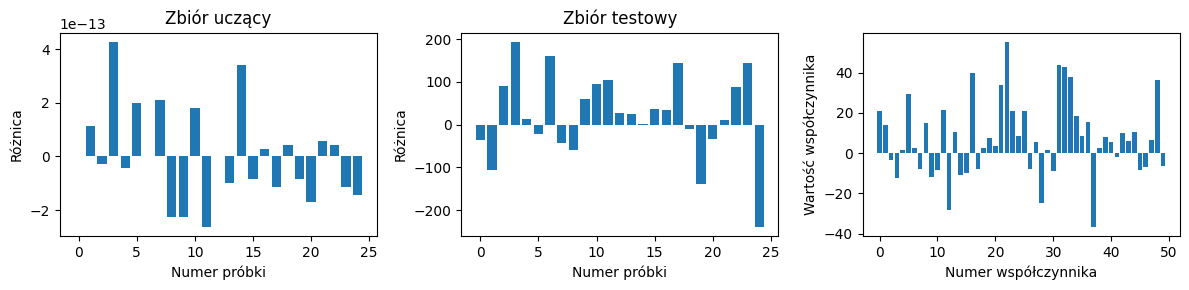

In [15]:
rysuj_roznice_i_współczynniki(y_train-model.predict(X_train),y_test-model.predict(X_test),model.coef_)

### Sposoby poprawienia modelu regresji
Model domyślnie dopasowuje się metodą najmniejszych kwadratów, czyli minimalizuje funkcję sse. Możemy zmienić tę 'taktykę' dodając 'karę' za jakość dobranych współczynników:
* metoda LASSO, ```linear_model.Lasso``` (preferuje jak najmniej niezerowych współczynników)
* regresja grzebietowa, ```linear_model.Ridge``` (preferuje jak najmniejsze współczynniki)

### Zadanie 1
We wcześniejszym rozumowaniu zmienić dane, by zbiór uczący mógł być większy niż liczba cech. Omówić wyniki.

### Zadanie 1.5 (zadanie domowe - 10 pkt)
* wygeneruj dane do regresji liniowej z 100 próbkami, 40 cechami, w tym 20 istotnymi i wybranym random_state
* przeprowadź analizę metodą Lasso dla różnych parametrów $\alpha$ (proszę popatrzeć na dobór $\alpha$ jakoś systemowo, a nie brać po prostu kilku losowych) i spróbuj określić jaki współczynnik jest najlepszy dla przewidywania przyszłych wyników

### Zadanie 2
Na podstawie danych ze zbioru `diabetes` przygotuj model, który będzie określał potencjalny rozwój cukrzycy na podstawie odpowiednich badań laboratoryjnych i wywiadu. Sprawdź współczynnik $R^2$. Określ jak rozwinie się choroba u pacjenta, od którego zebraliśmy następujące (unormowane) dane
```
[0.01628068, -0.04464164,  0.01750591, -0.02288468,  0.06034892, 0.0444058 ,  0.03023191, -0.00259226,  0.03723625, -0.0010777]
```

In [20]:
diab=datasets.load_diabetes()
print(diab['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# Klasyfikacja
Dokonamy klasyfikacji (przypisania do grup) danych na podstawie zbioru danych cech irysów. Korzystamy z modelu ```linear_model.LogisticRegression```. Można też wykorzystać w tym celu:
* drzewa decyzyjne ```tree.DecisionTreeClassifier```
* metodę najbliższego sąsiada ```neighbors.KNeighborsClassifier```

In [3]:
irysy=datasets.load_iris()

In [4]:
print(irysy.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [37]:
print(irysy.target_names)
print(irysy.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Właściwe dane oraz przewidywane wyniki mamy w ```irysy.data``` oraz ```irysy.target```

In [38]:
print(irysy.data.shape)
print(irysy.target.shape)
print(pd.Series(irysy.target).unique())

(150, 4)
(150,)
[0 1 2]


Dzielimy dane na uczące i testowe

In [5]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(irysy.data,irysy.target,train_size=0.3)

Teraz możemy sprawdzić różnice między naszymi klasyfikacjami, a danymi testowymi. Można też użyć gotowych funkcji do oceny.

In [8]:
y_pred-y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

In [9]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      0.95      0.96        37
           2       0.94      0.97      0.95        31

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



Teraz naszym modelem możemy oceniać dowolne inne napotkane kwiaty.

### Zadanie 3
Spośród cech irysów wybierz tylko dwie i zrób wykres rozrzutu tych cech na naszych danych


Następnie stwórz model klasyfikujący za pomocą metody najbliższych sąsiadów z $k=5$, wyszkól go i przetestuj (dla wcześniej zdefiniowanego podziału na dane testowe i uczące). 

Korzystając z danych testowych narysuj wykres punktowy (rozrzutu) opisujący te dwie wybrane cechy i z kolorami punktów zależnymi od klasyfikacji dokonanej przez model. Obok narysuj ten sam wykres z oryginalną klasyfikacją.

# Redukcja wymiarowości (metoda PCA)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA

irysy = datasets.load_iris()
X = irysy.data
y = irysy.target


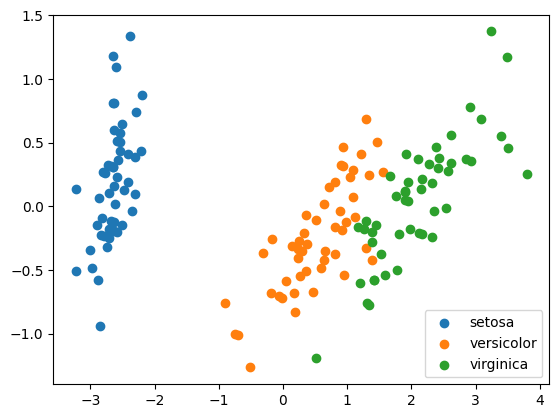

In [23]:
for i, target_name in enumerate(irysy.target_names): #można też zrobić zip([0, 1, 2], irysy.target_names)
    plt.scatter(
        X_zredukowany[y == i, 0], X_zredukowany[y == i, 1], label=target_name
    )
plt.legend()



Dane do PCA powinny być wstępnie przetworzone - powinny mieć średnią 0 i wariancję 1. [Przykład błędów bez przeskalowania](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py). Użyjemy w tym celu ```sklear.preprocessing.StandardScaler```

Zadbamy o wszystko w konkretnym przykładzie analizy raka piersi. 

In [24]:
from sklearn.datasets import load_breast_cancer
rak=load_breast_cancer()
rak_dane=rak.data
rak_dane.shape


(569, 30)

In [25]:
rak.target_names #maligant=złośliwy, benign=łagodny

array(['malignant', 'benign'], dtype='<U9')

In [26]:
rak_etykiety=rak.target
rak_etykiety.shape

(569,)

---
**uwaga:** Żeby stworzyć DF z danymi i etykietami musimy skleić tablice ```rak_dane``` i ```rak_etykiety```, ale ta druga musi mieć najpierw dobry rozmiar.

In [27]:
rak_final=np.concatenate([rak_dane,rak_etykiety.reshape(569,1)],axis=1)

In [28]:
rak_DF=pd.DataFrame(rak_final,columns=np.concatenate([rak.feature_names,['etykiety']]))

In [29]:
rak_DF;

In [30]:
rak_DF['etykiety'].replace(0, 'złośliwy',inplace=True)
rak_DF['etykiety'].replace(1, 'łagodny',inplace=True)

**W drugą stronę**: Stworzyliśmy ładny DF do analizy. Ale do machine learningu potrzebujemy surowych danych.

In [51]:
x=rak_DF.drop(columns=['etykiety']).values

In [66]:
((x-rak_dane)==0).all()

True

---

In [94]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(rak_dane,rak_etykiety,train_size=0.7)

In [85]:
X_train=x

In [95]:
np.mean(X_train),np.std(X_train)

(62.066464329991625, 230.19421763660205)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler_rak=StandardScaler().fit(X_train)
X_scaled=scaler_rak.transform(X_train)

In [114]:
np.mean(X_scaled),np.std(X_scaled)

(-6.665057487866936e-17, 1.0)

Teraz przechodzimy do właściwego rzutowania; na początek na dwie zmienne, żeby się dobrze robiło obrazek.

In [103]:
from sklearn.decomposition import PCA
pca_rak=PCA(n_components=2)
X_gs=pca_rak.fit(X_scaled).transform(X_scaled)

In [104]:
gs_rak_DF=pd.DataFrame(data=X_gs, columns=['skladowa1','skladowa2'])

In [105]:
gs_rak_DF.head()

,skladowa1,skladowa2
0,-1.186484,0.956091
1,-2.593737,0.545797
2,5.789319,3.263134
3,-2.497911,-0.464711
4,2.257950,-0.358734


Możemy teraz wydobyć z modelu informację na ile przejął on wariancję z pełnych danych:


In [92]:
pca_rak.explained_variance_ratio_

array([0.44272026, 0.18971182])

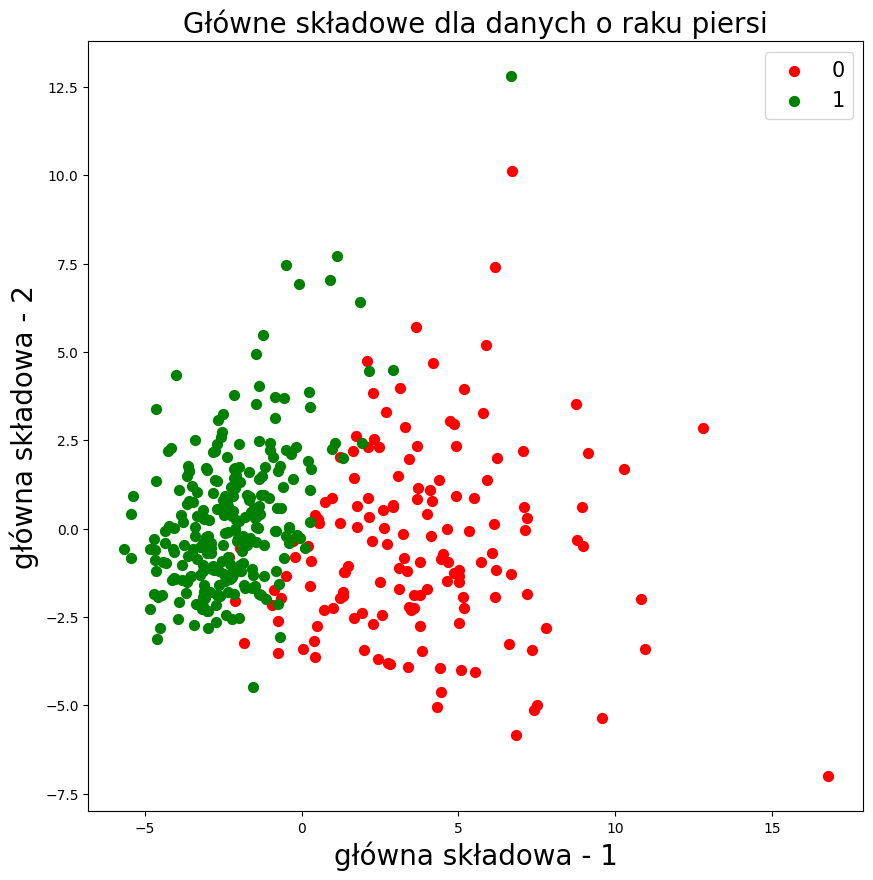

In [106]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot()
ax.set_xlabel('główna składowa - 1',fontsize=20)
ax.set_ylabel('główna składowa - 2',fontsize=20)
ax.set_title("Główne składowe dla danych o raku piersi",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    maska = y_train == target
    ax.scatter(gs_rak_DF.loc[maska, 'skladowa1']
               , gs_rak_DF.loc[maska, 'skladowa2'], c = color, s = 50)

ax.legend(targets,prop={'size': 15})

Teraz możemy użyć któregoś z nadzorowanych klasyfikatorów (np. LogisticRegression)

LogisticRegression()

Sprawdźmy skuteczność na zbiorze uczącym:

array([[138,   7],
       [ 11, 242]], dtype=int64)

A teraz na zbiorze testowym:

### Zadanie 4
Zbadaj zbiór danych o winach (```datasets.load_wine()```).

* Przeprowadź rzutowanie  w taki sposób, by przejęło ono co najmniej 90% wariancji. Ile jest głównych składowych?
* Przeprowadź klasyfikację metodą regresji logistycznej i określ jej jakość.


## Preprocessing

Dotychczas używaliśmy StandardScaler. Porównajmy go oraz zastosowanie QuantileTransformer na [danych](https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata1.csv)

In [122]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [117]:
df=pd.read_csv('https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata1.csv')
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [119]:
df['z'].unique()

array(['a', 'b'], dtype=object)

In [123]:
X=df[['x','y']].values
y=df['z']=='a' #szybkie zrzutowanie dwóch różnych wartości na 0 i 1 (czyli True/False)

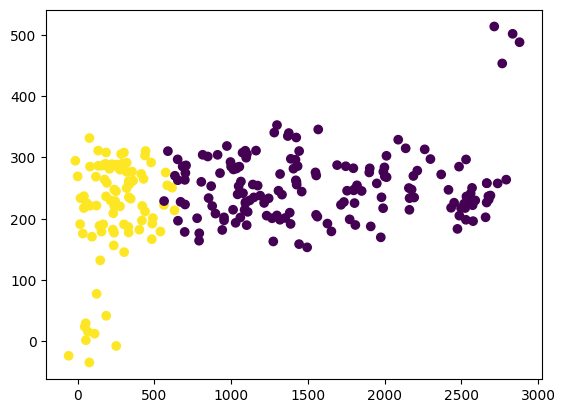

In [124]:
plt.scatter(X[:, 0], X[:, 1], c=y);

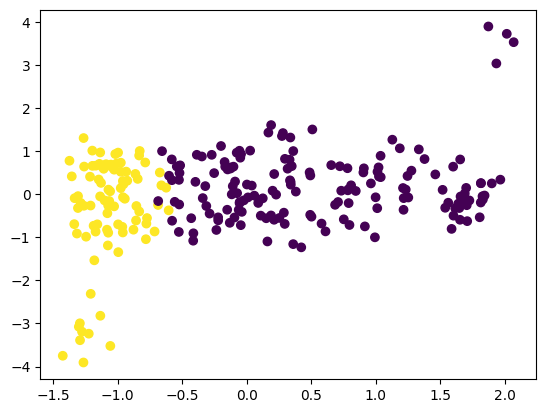

In [125]:
tr2=StandardScaler()
X2=tr2.fit_transform(X)
plt.scatter(X2[:, 0], X2[:, 1], c=y);

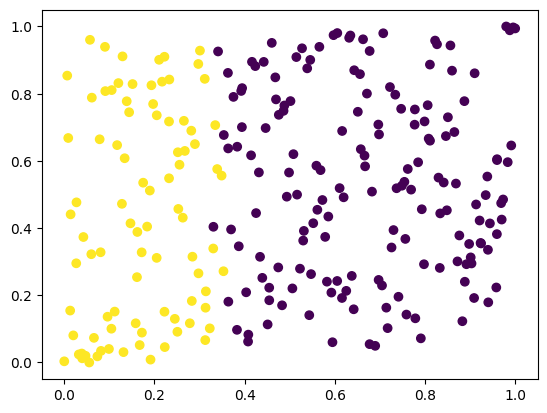

In [126]:

tr1=QuantileTransformer(n_quantiles=100)
X1=tr1.fit_transform(X)
plt.scatter(X1[:, 0], X1[:, 1], c=y);

### Zadanie 5
Spróbuj wstępnie obrobić [dane](https://raw.githubusercontent.com/koaning/calm-notebooks/master/scikit-prep/drawndata2.csv) i zastosować regresję logistyczną. Czy stosowanie StandardScaler lub QuantileTransformer jest dobre dla tych danych?

# <center>Materiały dodatkowe</center>

## Przyspieszanie operacji - pipeline

In [26]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('skalowanie',StandardScaler()),
    ('redukcjaPCA',PCA()),
    ('klasyfikator',linear_model.LogisticRegression())
])

In [30]:
pipe.fit(X_tr,y_tr)
pipe.predict(X_tr)-y_tr
pipe.predict(X_test)-y_test

array([ 0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

## Preprocessing - dane kategoryczne

[Samouczek o preprocessingu](https://scikit-learn.org/stable/modules/preprocessing.html)

Zmiana danych kategorycznych na liczbowe:

* ```sklearn.preprocessing.OneHotEncoder```
* ```sklearn.preprocessing.OrdinarEncoder```

[Artykuł o przetwarzaniu etykiet](https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79)

## Wybrór najlepszego modelu
```sklearn.model_selection.GridSearchCV``` - przeprowadza analizę modelu dla szeregu wartości parametrów z automatycznym doborem na zbiory testowe i uczące (cross validation)

## Więcej o sklearn

[kurs sk-learn na youTube](https://www.youtube.com/watch?v=0B5eIE_1vpU)

[materiały na github+kurs wideo](https://github.com/koaning/calm-notebooks)